In [2]:
import seaborn as sns
import pandas as pd

In [15]:
df = pd.read_csv("plotdata.csv")
df2 = pd.read_csv("plotdata_16_45.csv")
df2["Param"] = "old_style_mutator"
df3 = pd.concat([df,df2])
df3 = df3.set_index("Unnamed: 0")

# fill values so that all runs have measurements ad every step position.
df3 = pd.pivot_table(df3,index="Step", columns=["Seed","Param"],values="Coverage").fillna(method="ffill").reset_index()
df3 = df3.melt(id_vars="Step", var_name=["Seed","Param"], value_name="Coverage")
df3

,Step,Seed,Param,Coverage
0,2,0,"('',)",30.0
1,3,0,"('',)",30.0
2,4,0,"('',)",41.0
3,5,0,"('',)",74.0
4,6,0,"('',)",81.0
...,...,...,...,...
2620855,797660,9,old_style_mutator,471.0
2620856,797692,9,old_style_mutator,471.0
2620857,797802,9,old_style_mutator,471.0
2620858,798545,9,old_style_mutator,471.0


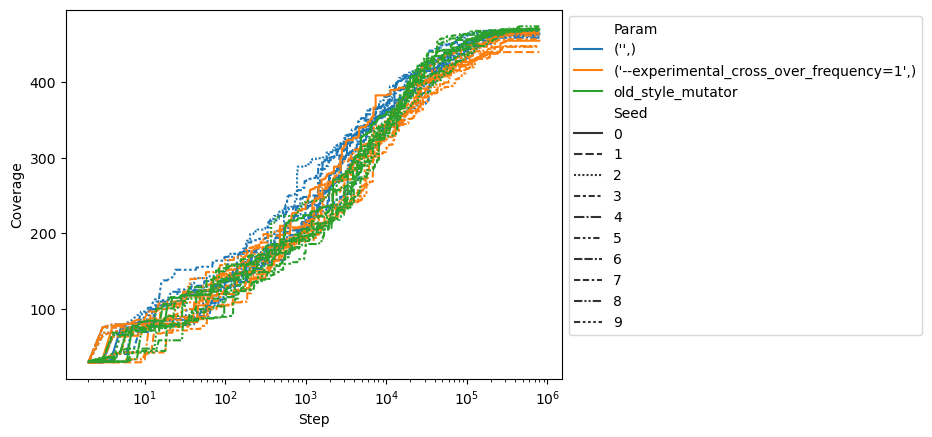

In [16]:
ax = sns.lineplot(data=df3, x="Step",y="Coverage", style="Seed", hue="Param")
ax.set_xscale('log') 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

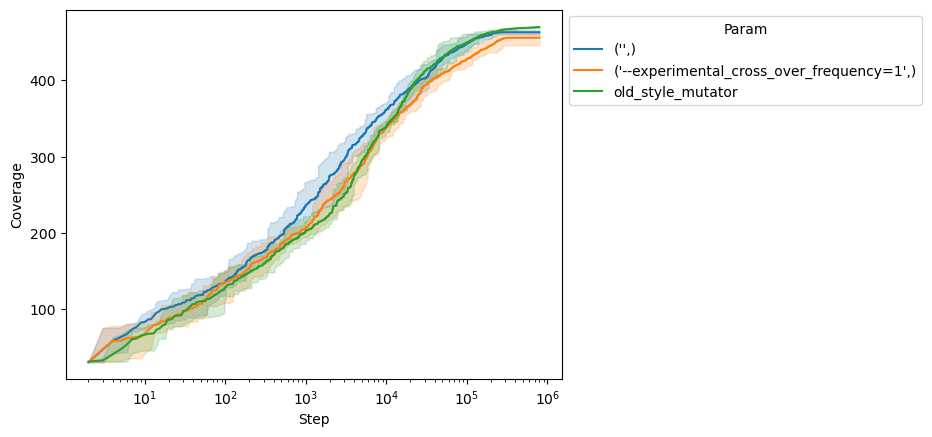

In [18]:
ax = sns.lineplot(data=df3, x="Step",y="Coverage", hue="Param", errorbar=("pi", 75))
ax.set_xscale('log') 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))